# Data Analysis over the Clusters
## Loading libraries

In [1]:
import numpy as np
import cygnus_lib as cy
import toolslib as tl
import matplotlib.pyplot as plt
import pandas as pd
from time import time
from ast import literal_eval
from math import degrees

## font definition
%matplotlib inline
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
plt.rcParams['font.serif'] = ['Bitstream Vera Sans']

## Variables definition

In [2]:
x_resolution = y_resolution = 2048
rescale      = 512
scale        = int(x_resolution/rescale)
pixelscale   = 55e-3             #55e-3 for Orange ------ 0.125 for lemonn mm/pixel

## Loading data

List contain:

[0 - Run number, 1 - Image Number, 2 - Tag of the cluster, 3 - Pixel X position, 4 - Pixel Y position, 5 - Light in the pixel, 6 - Pedestal in the pixel]

In [3]:
tic=time()
#------------------- Loading File ------------------------------#
directory = ("./data/")          # Directory of the output file
filename  = ("ClustersTable")    # Name of the output file
extension = (".csv")             # Extension of the output file
dataout = directory + filename + extension # Full path of the output file

dt = {'Run': np.int64, 'Image': np.int64, 'Tag': np.object, 'X': np.object, 'Y': np.object, 'Light': np.object, 'Pedestal': np.object}
colhead = ["Run","Image","Tag","X","Y","Light","Pedestal"]
df = pd.read_csv(dataout,dtype=dt)

In [4]:
df.loc[:,'X'] = df.loc[:,'X'].apply(literal_eval)
df.loc[:,'Y'] = df.loc[:,'Y'].apply(literal_eval)
df.loc[:,'Light'] = df.loc[:,'Light'].apply(literal_eval)
df.loc[:,'Pedestal'] = df.loc[:,'Pedestal'].apply(literal_eval)
toc = time()

In [5]:
print("Loading time: %.2f" % ((toc-tic)/60))

Loading time: 12.00


In [6]:
# Showing the table
df.head(n = 10)

,Run,Image,Tag,X,Y,Light,Pedestal
0,494,0,m,"[808, 808, 808, 808, 809, 809, 809, 809, 810, ...","[40, 41, 42, 43, 40, 41, 42, 43, 40, 41, 42, 4...","[103, 96, 98, 103, 97, 129, 99, 120, 100, 98, ...","[103, 102, 101, 104, 100, 115, 102, 104, 104, ..."
1,494,0,m,"[652, 652, 652, 652, 653, 653, 653, 653, 654, ...","[112, 113, 114, 115, 112, 113, 114, 115, 112, ...","[98, 102, 99, 104, 103, 102, 101, 98, 103, 99,...","[99, 102, 103, 102, 102, 102, 100, 102, 102, 1..."
2,494,0,m,"[404, 404, 404, 404, 405, 405, 405, 405, 406, ...","[160, 161, 162, 163, 160, 161, 162, 163, 160, ...","[96, 101, 102, 103, 100, 100, 100, 98, 104, 10...","[96, 102, 102, 102, 99, 103, 102, 99, 102, 103..."
3,494,0,m,"[1272, 1272, 1272, 1272, 1273, 1273, 1273, 127...","[488, 489, 490, 491, 488, 489, 490, 491, 488, ...","[103, 96, 100, 103, 100, 105, 100, 100, 103, 1...","[102, 103, 103, 103, 103, 103, 106, 102, 102, ..."
4,494,0,m,"[1208, 1208, 1208, 1208, 1209, 1209, 1209, 120...","[724, 725, 726, 727, 724, 725, 726, 727, 724, ...","[99, 108, 106, 102, 102, 106, 111, 100, 101, 1...","[102, 103, 102, 102, 104, 102, 110, 102, 102, ..."
5,494,0,m,"[1516, 1516, 1516, 1516, 1517, 1517, 1517, 151...","[780, 781, 782, 783, 780, 781, 782, 783, 780, ...","[103, 108, 116, 100, 113, 111, 111, 110, 109, ...","[102, 102, 105, 102, 109, 103, 102, 103, 104, ..."
6,494,0,m,"[1484, 1484, 1484, 1484, 1485, 1485, 1485, 148...","[856, 857, 858, 859, 856, 857, 858, 859, 856, ...","[109, 100, 103, 98, 104, 101, 101, 110, 114, 1...","[103, 104, 104, 107, 103, 103, 106, 104, 104, ..."
7,494,0,m,"[700, 700, 700, 700, 701, 701, 701, 701, 702, ...","[996, 997, 998, 999, 996, 997, 998, 999, 996, ...","[133, 106, 106, 101, 100, 120, 113, 103, 103, ...","[135, 103, 102, 102, 104, 110, 105, 102, 103, ..."
8,494,0,m,"[516, 516, 516, 516, 517, 517, 517, 517, 518, ...","[1060, 1061, 1062, 1063, 1060, 1061, 1062, 106...","[100, 103, 102, 111, 103, 98, 99, 101, 100, 11...","[105, 102, 104, 107, 103, 103, 99, 103, 102, 1..."
9,494,0,m,"[804, 804, 804, 804, 805, 805, 805, 805, 806, ...","[1240, 1241, 1242, 1243, 1240, 1241, 1242, 124...","[107, 102, 102, 104, 109, 109, 114, 107, 111, ...","[100, 105, 104, 103, 105, 107, 109, 103, 103, ..."


In [7]:
variables = df.iloc[:,0:3].copy()
variables.head(n = 5)

,Run,Image,Tag
0,494,0,m
1,494,0,m
2,494,0,m
3,494,0,m
4,494,0,m


## Declaration  of the new variables

In [8]:
sl = np.zeros(df.shape[0],dtype=float)
sb = np.zeros(df.shape[0],dtype=float)
sp = np.zeros(df.shape[0],dtype=float)
co = np.zeros(df.shape[0],dtype=float)

In [9]:
## Loop to calculate the new variables

for ind in range(0,df.shape[0]):
    sl[ind] = np.sum(df.Light[ind])
    sb[ind] = np.sum(df.Pedestal[ind])
    sp[ind] = np.size(df.X[ind])
    co[ind] = np.abs(np.corrcoef(df.X[ind],df.Y[ind])[0][1])    
    #lenY[ind]  = np.mean(np.unique(df.X[ind],return_counts=True)[1]*scale)
    #lenX[ind]  = np.mean(np.unique(df.Y[ind],return_counts=True)[1]*scale)

In [10]:
# Insertion in the table
variables.insert(3,'SumLight',sl)
variables.insert(4,'SumPedestal',sb)
variables.insert(5,'SumPixels',sp)
variables.insert(6,'PhotonPPixels',(sl-sb)/sp)
variables.insert(7,'XYCorrelation',co)
variables.insert(8,'LightPPixel',sl/sp)

In [11]:
variables.head(n=10)

,Run,Image,Tag,SumLight,SumPedestal,SumPixels,PhotonPPixels,XYCorrelation,LightPPixel
0,494,0,m,639904.0,605129.0,5888.0,5.906080,0.680871,108.679348
1,494,0,m,276976.0,261851.0,2544.0,5.945362,0.693469,108.874214
2,494,0,m,283543.0,271467.0,2640.0,4.574242,0.716070,107.402652
3,494,0,m,223004.0,208398.0,2016.0,7.245040,0.234880,110.617063
4,494,0,m,933856.0,886972.0,8544.0,5.487360,0.876593,109.299625
5,494,0,m,152000.0,143567.0,1376.0,6.128634,0.826296,110.465116
6,494,0,m,441261.0,413057.0,3968.0,7.107863,0.452934,111.204889
7,494,0,m,180194.0,167429.0,1616.0,7.899134,0.665383,111.506188
8,494,0,m,241204.0,228315.0,2208.0,5.837409,0.115408,109.240942
9,494,0,m,153964.0,150582.0,1456.0,2.322802,0.280943,105.744505


In [12]:
variables[(variables.Tag == 'l')]

,Run,Image,Tag,SumLight,SumPedestal,SumPixels,PhotonPPixels,XYCorrelation,LightPPixel
91,494,1,l,5812312.0,5292118.0,51024.0,10.195085,0.995025,113.913296
1231,494,16,l,2458209.0,2248363.0,21680.0,9.679244,0.373952,113.386024
1317,494,17,l,1253232.0,1130440.0,10928.0,11.236457,0.079112,114.680820
1318,494,17,l,942956.0,847008.0,8192.0,11.712402,0.965863,115.106934
1955,494,24,l,2821348.0,2527418.0,24432.0,12.030534,0.996211,115.477570
2157,494,26,l,1837777.0,1642448.0,15744.0,12.406568,0.947466,116.728722
2564,494,31,l,848350.0,766691.0,7392.0,11.046943,0.211396,114.765963
3283,494,40,l,1056796.0,967458.0,9296.0,9.610370,0.923060,113.682874
3363,494,41,l,14059051.0,12103799.0,115904.0,16.869582,0.032642,121.299101
3472,494,42,l,1000498.0,916990.0,8864.0,9.421029,0.940581,112.872067


In [13]:
SLP = tl.getTaggedVariable(variables,'SumLight')
PPP = tl.getTaggedVariable(variables,'PhotonPPixels')
COR = tl.getTaggedVariable(variables,'XYCorrelation')
LPP = tl.getTaggedVariable(variables,'LightPPixel')

/usr/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


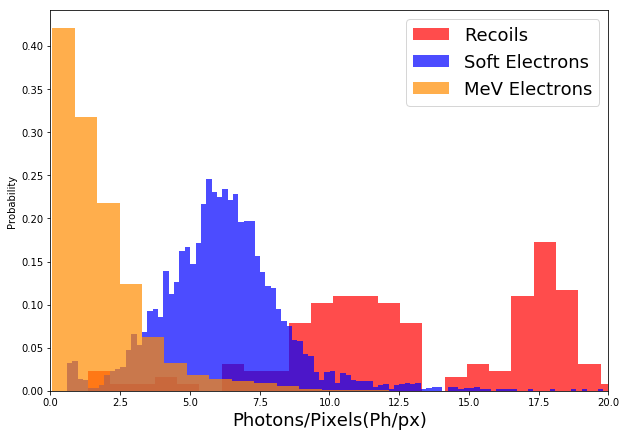

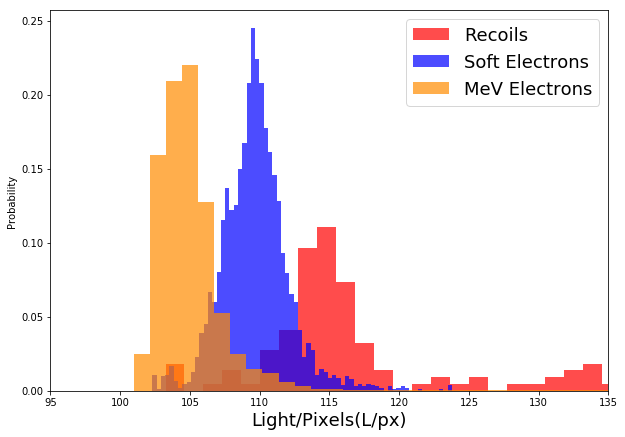

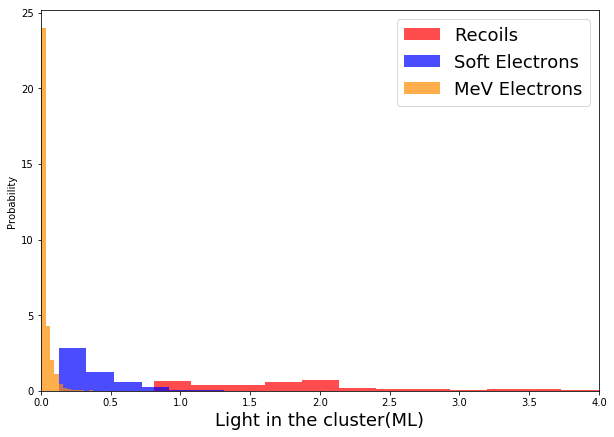

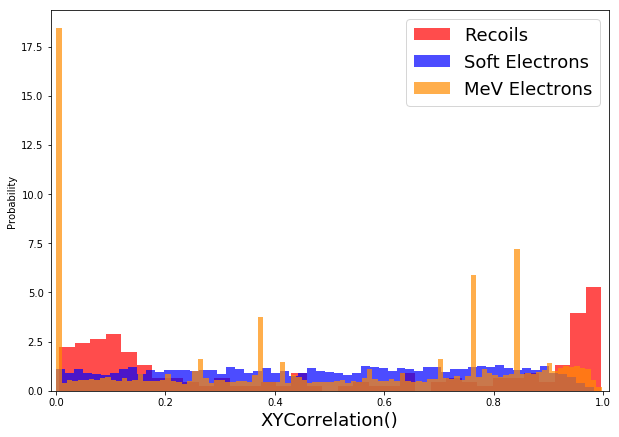

In [14]:
tl.plot2hist(PPP, bins = [25,100,400], liml = 0, limr = 20, label='Photons/Pixels', scale = '', unity = 'Ph/px', logx = False, logy = False)
tl.plot2hist(LPP, bins = [35,70,300], liml = 95, limr = 135, label='Light/Pixels', scale = '', unity = 'L/px', logx = False, logy = False)
tl.plot2hist(SLP, bins = [50,400,500], liml = 0, limr = 4, label='Light in the cluster', scale = 'M', unity = 'L', logx = False, logy = False)
tl.plot2hist(COR, bins = [35,60,100], liml = -0.01, limr = 1.01, label='XYCorrelation', scale = '', unity = '', logx = False, logy = False)

## Ploting the specified type of cluster

/usr/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


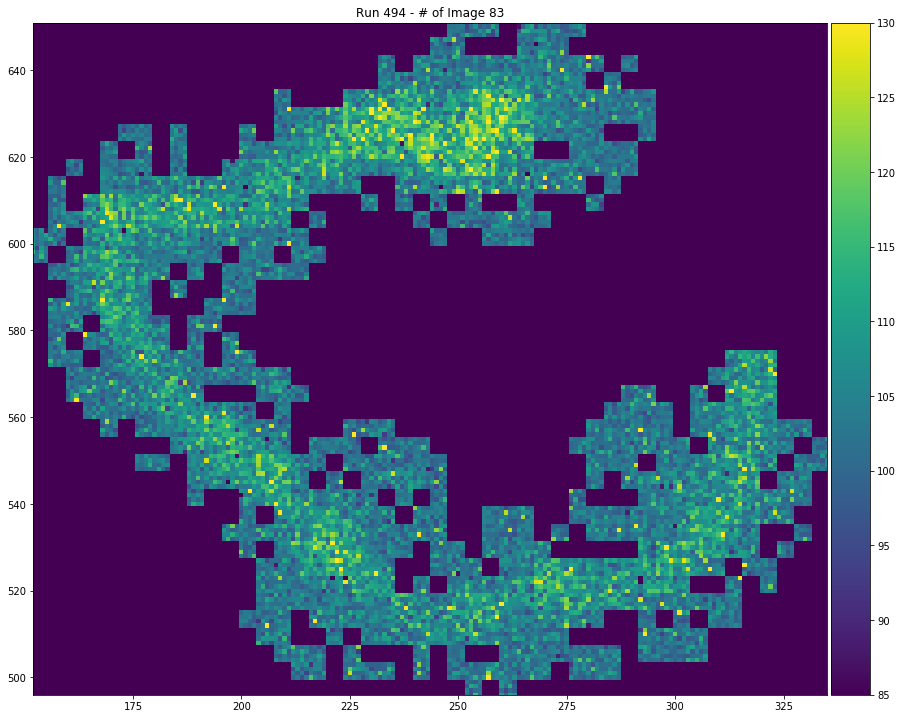

Press <ret> to continue -> 


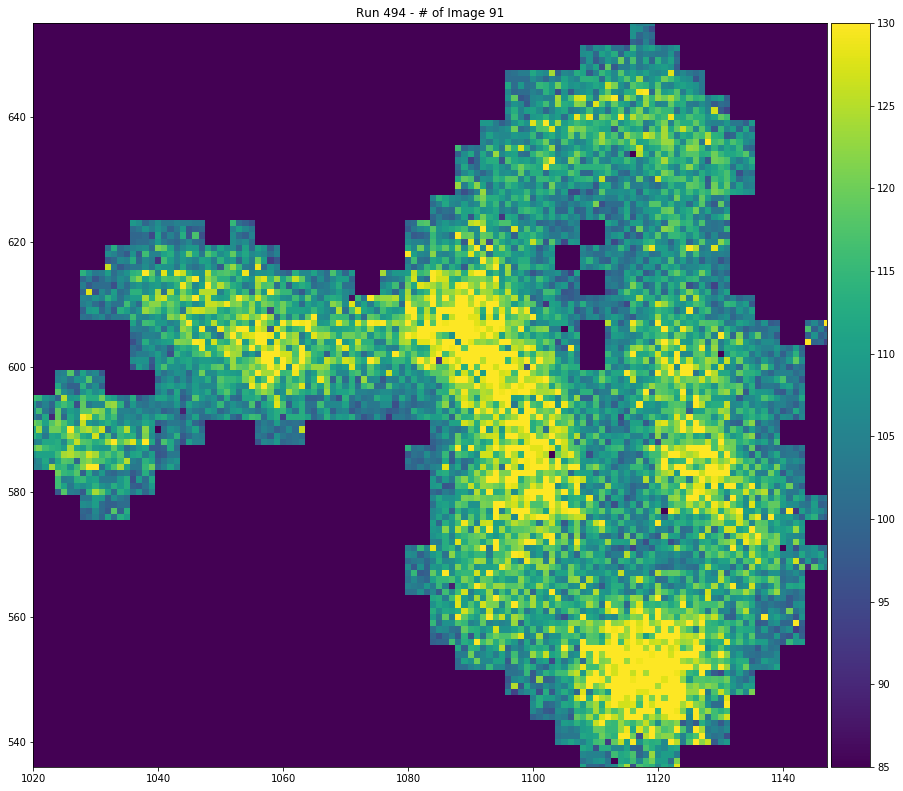

Press <ret> to continue -> 


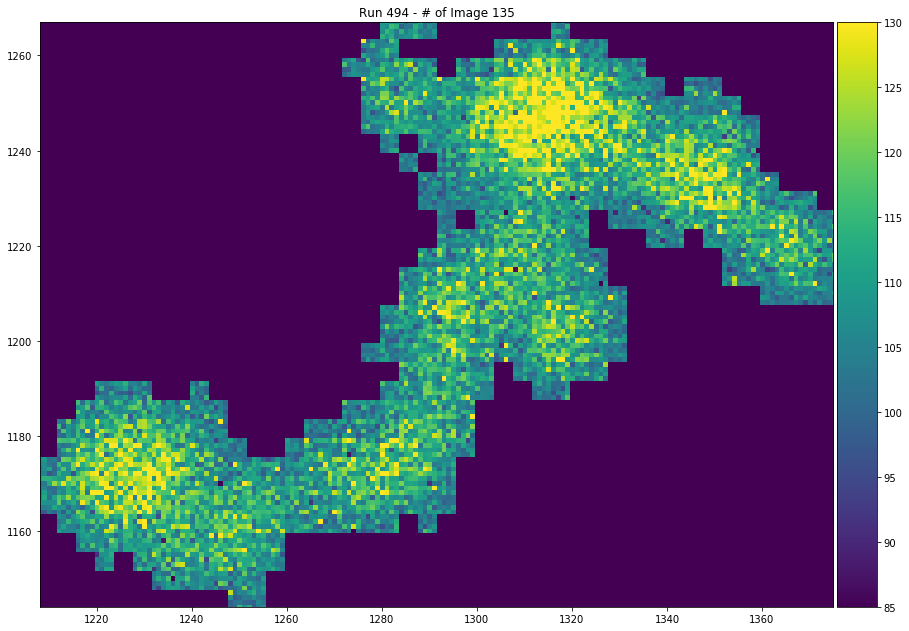

Press <ret> to continue -> 


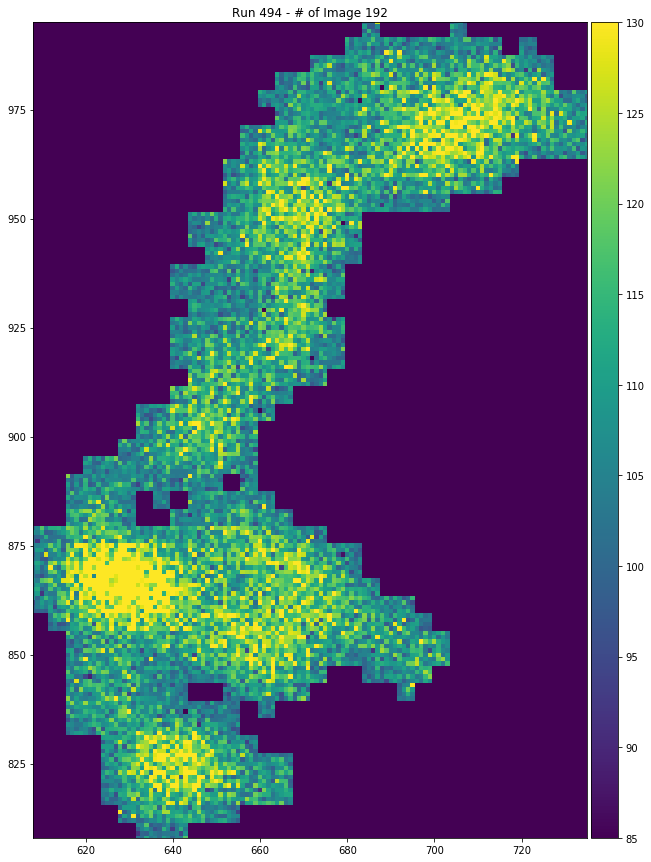

Press <ret> to continue -> 


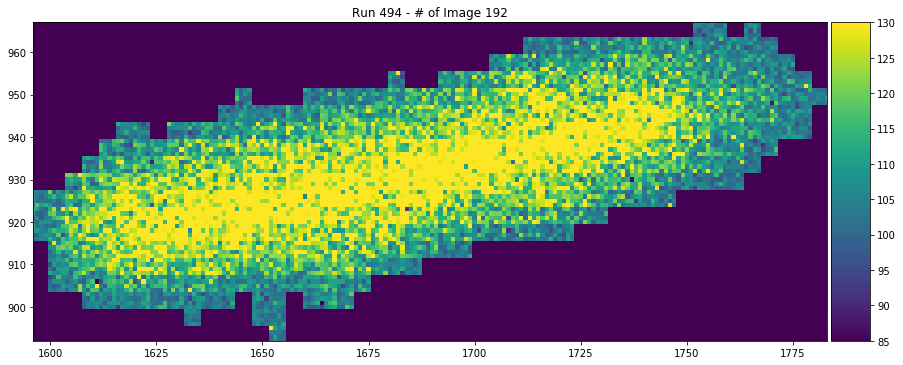

Press <ret> to continue -> 


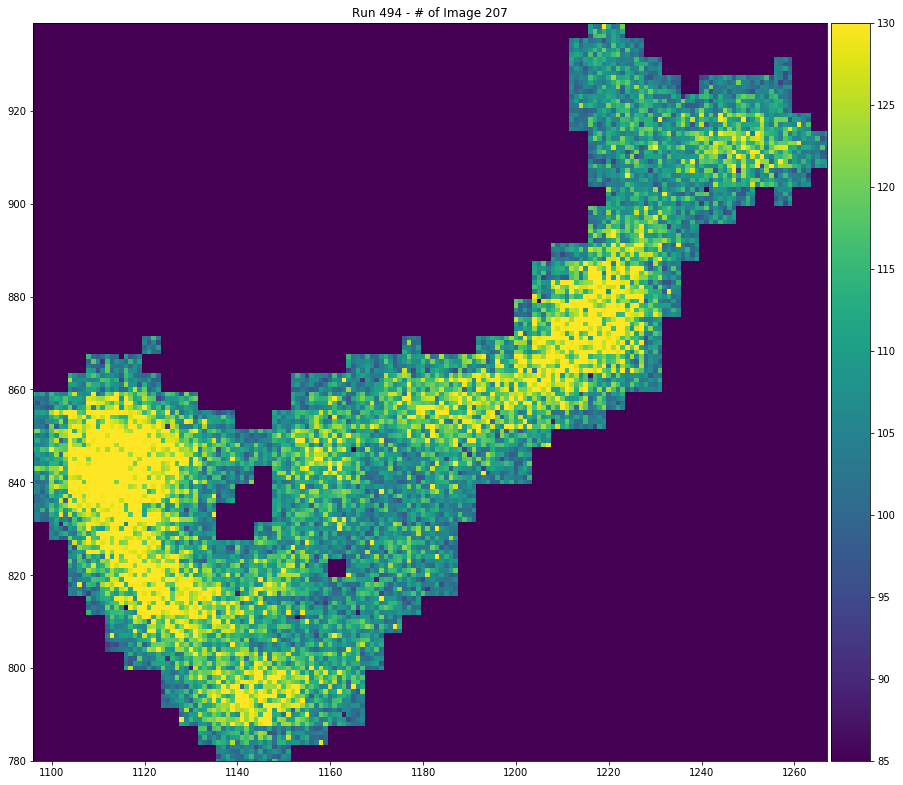

Press <ret> to continue -> 


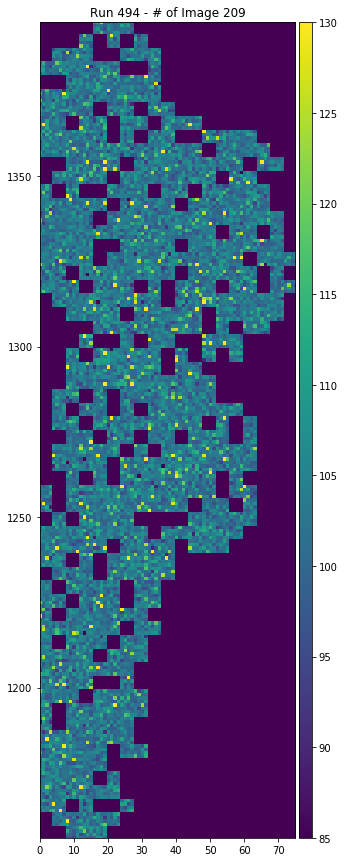

Press <ret> to continue -> 


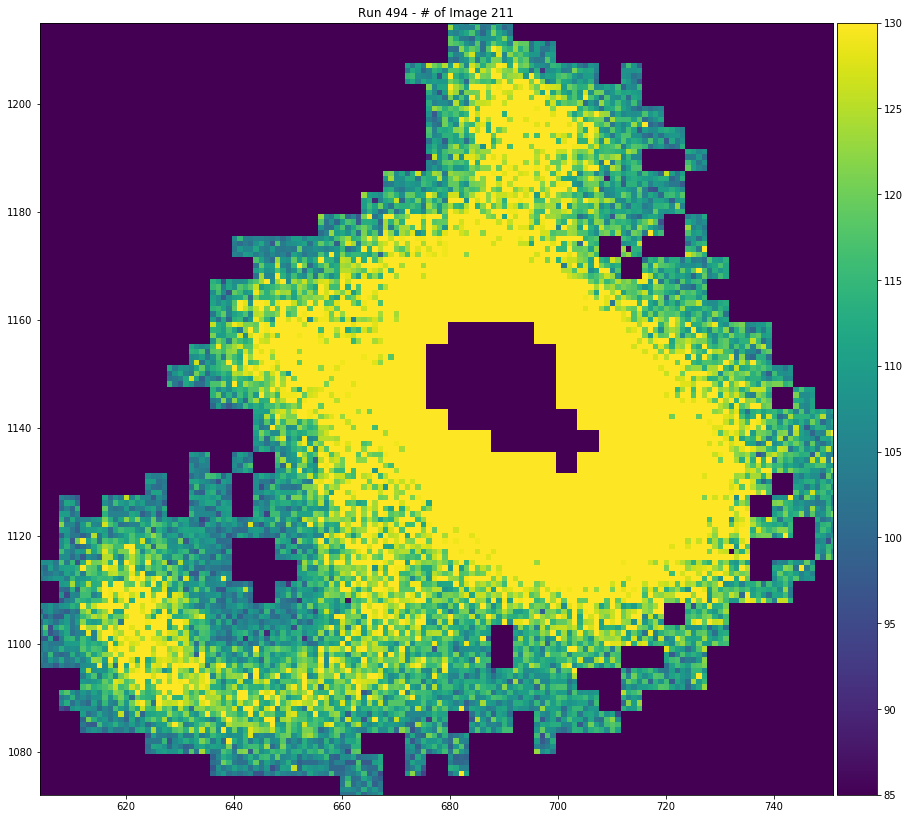

Press <ret> to continue -> 


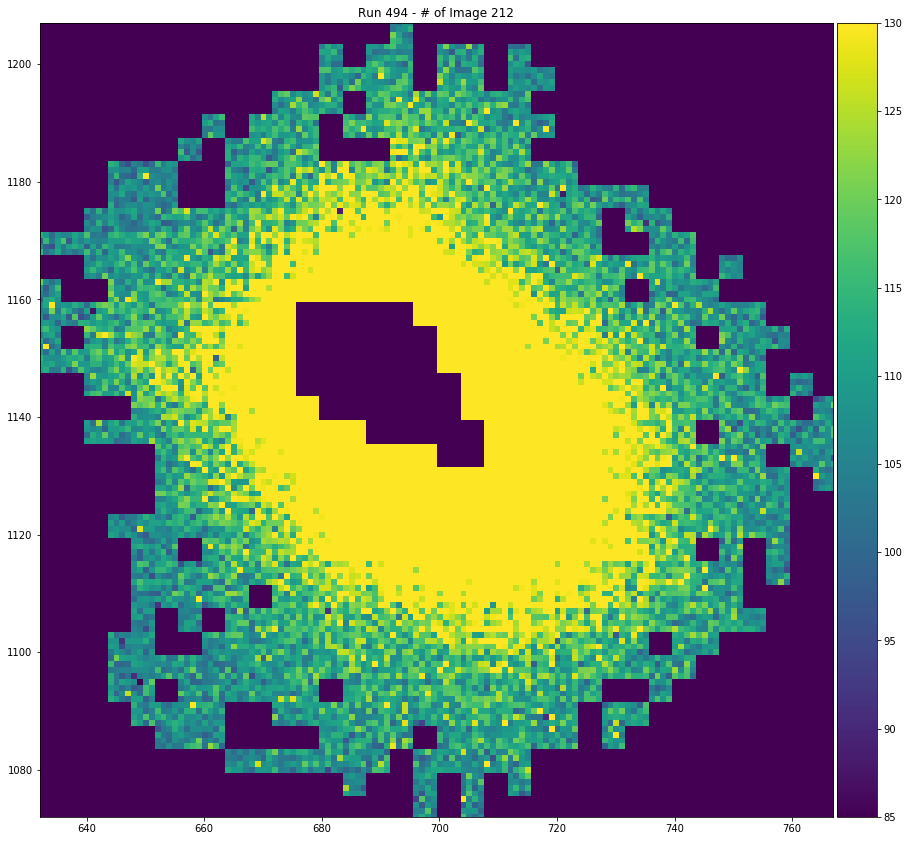

Press <ret> to continue -> 


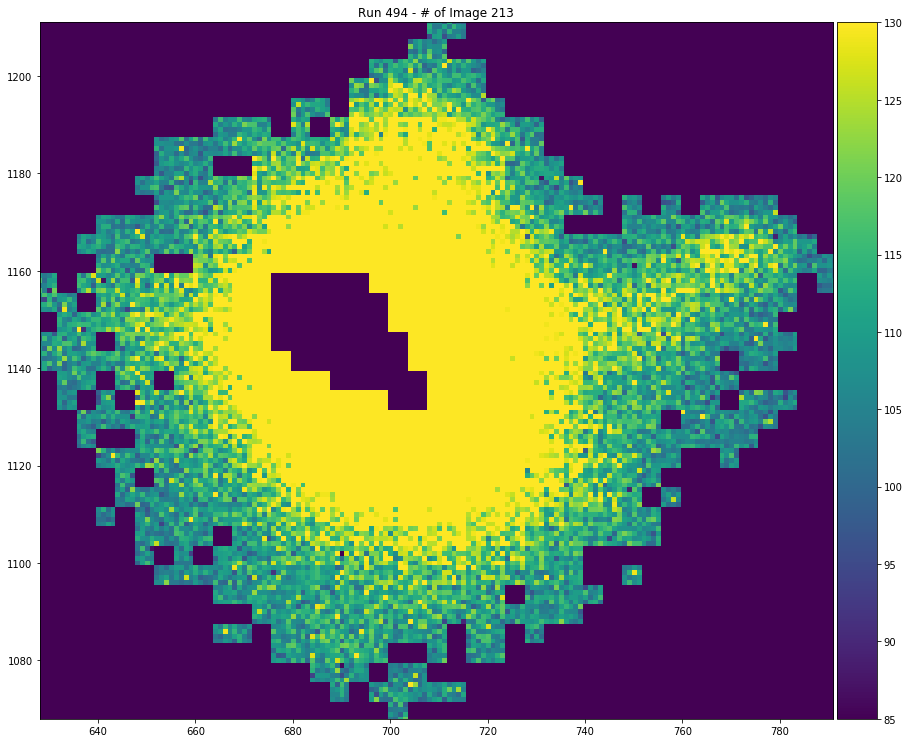

Press <ret> to continue -> 


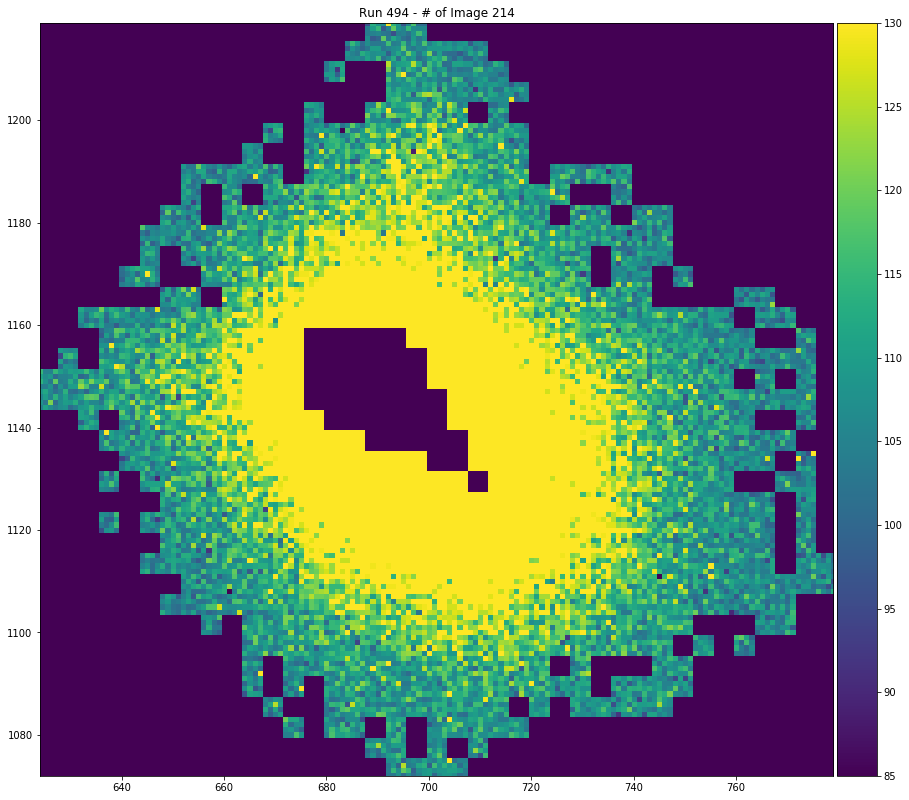

Press <ret> to continue -> 


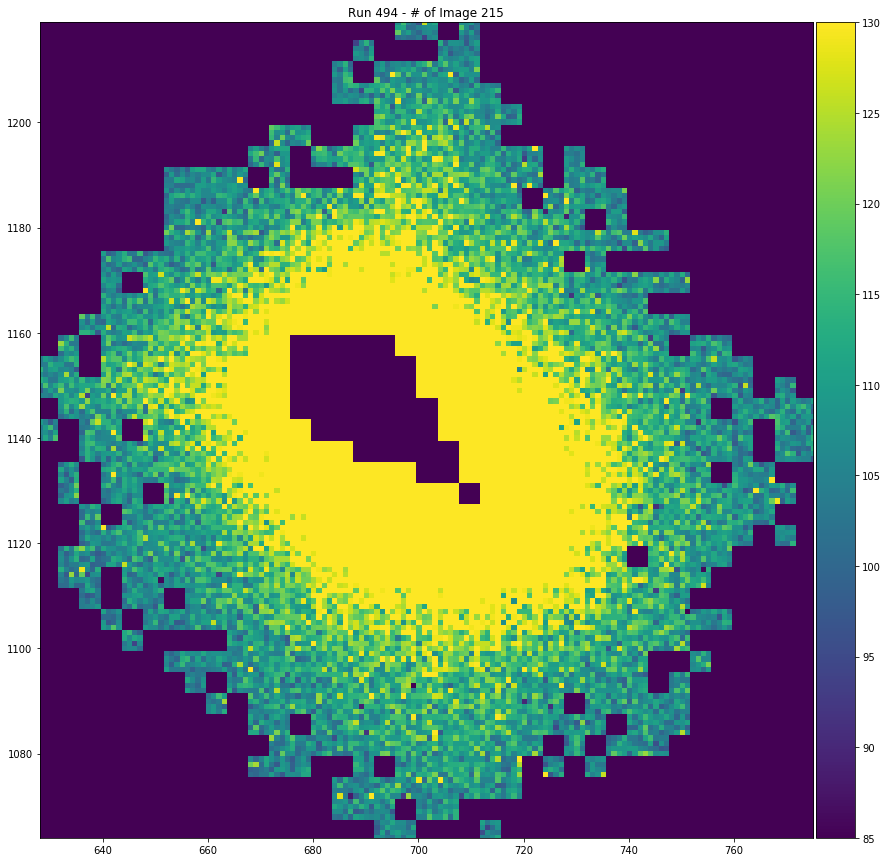

Press <ret> to continue -> 


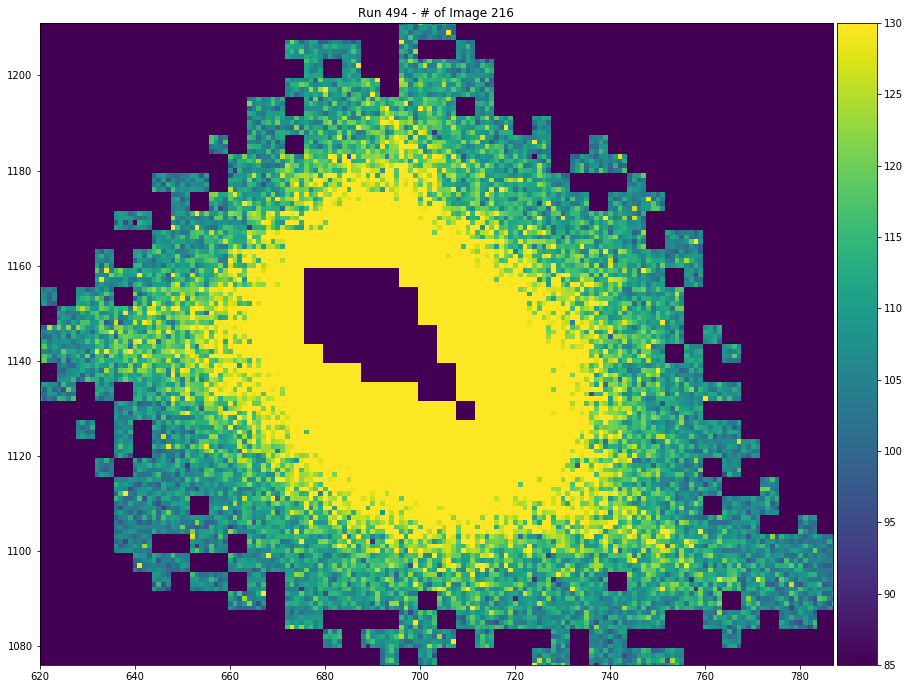

Press <ret> to continue -> 


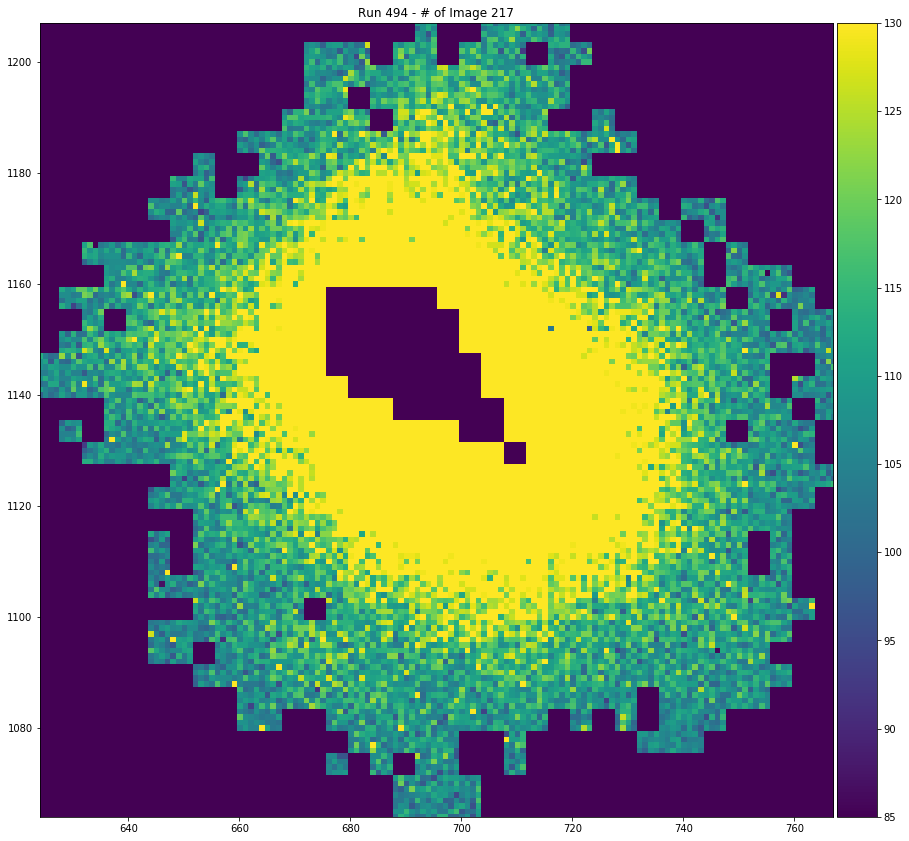

Press <ret> to continue -> 


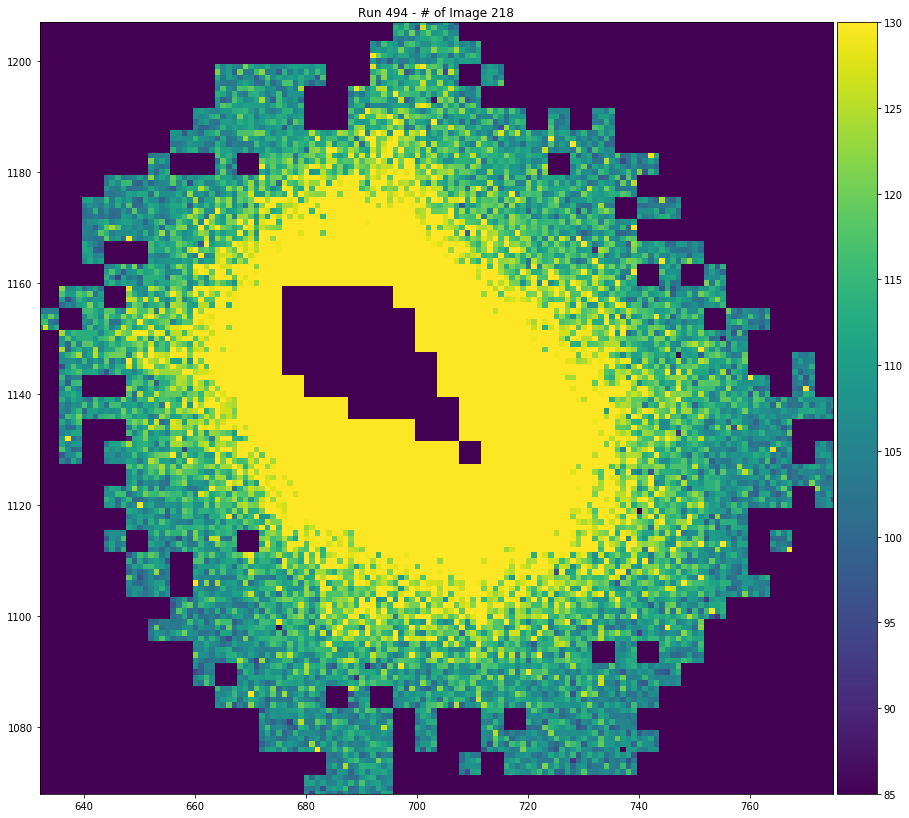

Press <ret> to continue -> 


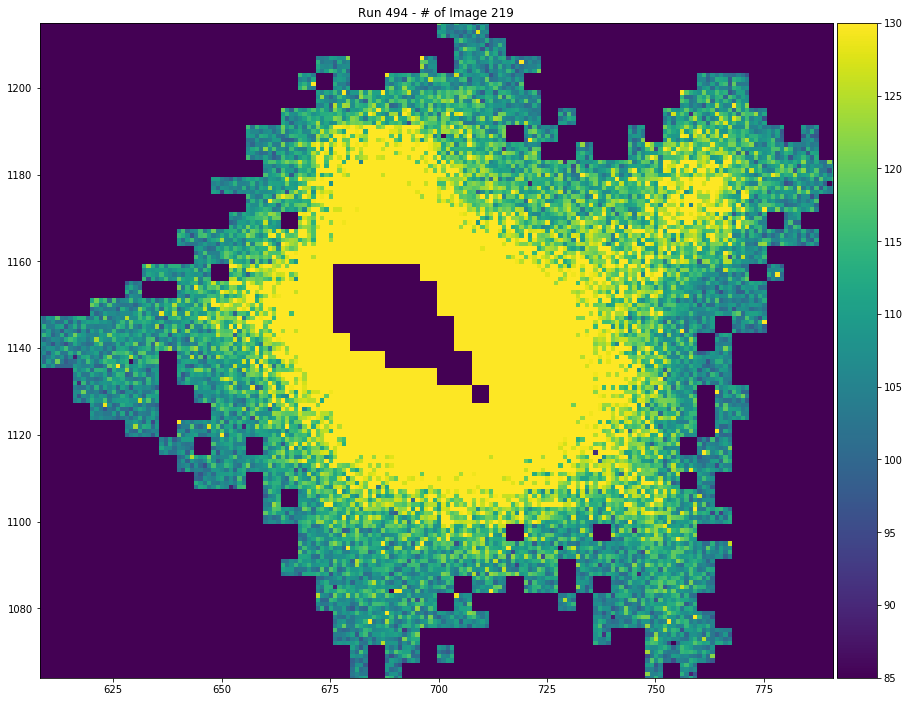

Press <ret> to continue -> 


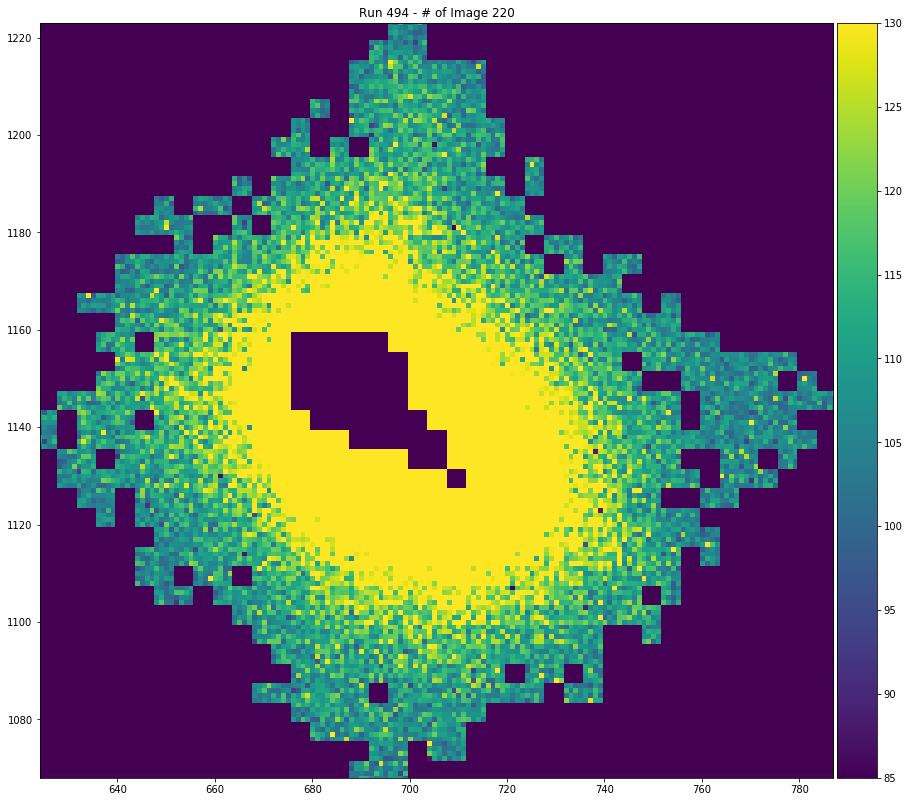

Press <ret> to continue -> 


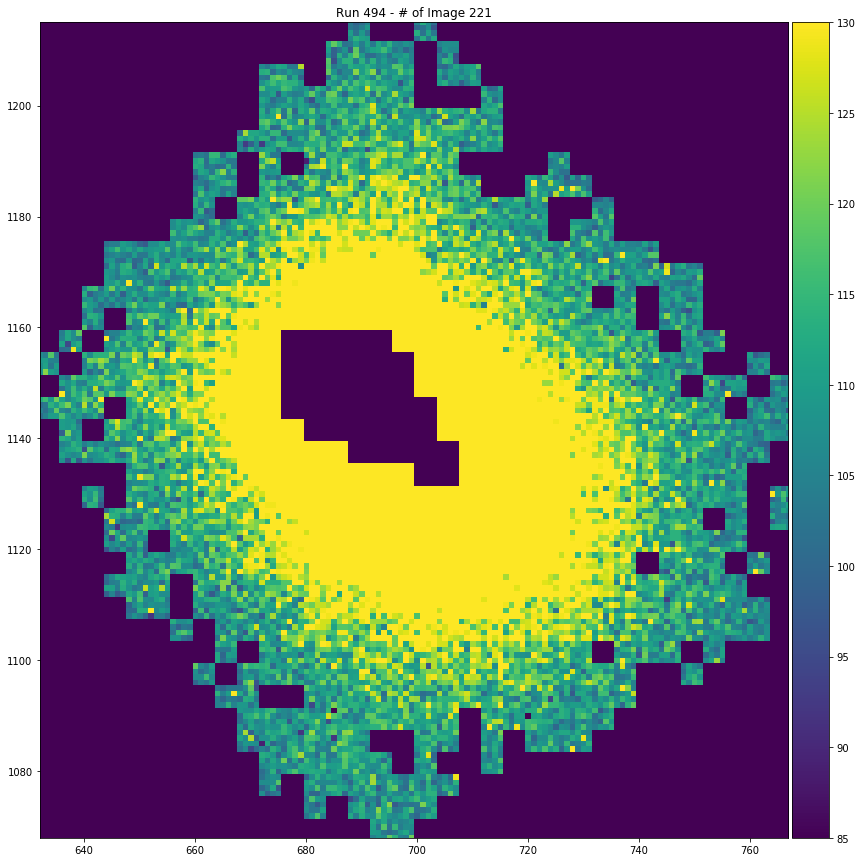

Press <ret> to continue -> stop


In [36]:
tag = 'l'
for cluN in ttt:#[2563]:#df.index[df.Tag == tag]:

    #cluN = 91 ## Specified Cluster

    Run = df[colhead[0]][cluN]
    Nim = df[colhead[1]][cluN]
    Xi  = df[colhead[3]][cluN]
    Yi  = df[colhead[4]][cluN]
    Lp  = df[colhead[5]][cluN]
    Lb  = df[colhead[6]][cluN]

    matrix = np.zeros([y_resolution,x_resolution],dtype=int)
    matrixb = np.zeros([y_resolution,x_resolution],dtype=int)
    
    matrix[Yi,Xi]=Lp
    matrixb[Yi,Xi]=Lb
    
    fig = plt.figure(figsize=(15,15))
    ax  = plt.gca()
    
    iax = ax.imshow(matrix,cmap="viridis", vmin=85,vmax=130)
    ax.set_ylim(np.min(Yi),np.max(Yi))
    ax.set_xlim(np.min(Xi),np.max(Xi))
    ax.set_title('Run %d - # of Image %d' % (Run, Nim))
    tl.colorbar(iax)
    plt.show(block=False)    
    
    key = input('Press <ret> to continue -> ')
    if key == 'stop':
        break
    plt.close

## Developing 

In [16]:
featuresL = variables[variables.Tag == 'l'].copy()
featuresL.head(n = 10)

,Run,Image,Tag,SumLight,SumPedestal,SumPixels,PhotonPPixels,XYCorrelation,LightPPixel
91,494,1,l,5812312.0,5292118.0,51024.0,10.195085,0.995025,113.913296
1231,494,16,l,2458209.0,2248363.0,21680.0,9.679244,0.373952,113.386024
1317,494,17,l,1253232.0,1130440.0,10928.0,11.236457,0.079112,114.680820
1318,494,17,l,942956.0,847008.0,8192.0,11.712402,0.965863,115.106934
1955,494,24,l,2821348.0,2527418.0,24432.0,12.030534,0.996211,115.477570
2157,494,26,l,1837777.0,1642448.0,15744.0,12.406568,0.947466,116.728722
2564,494,31,l,848350.0,766691.0,7392.0,11.046943,0.211396,114.765963
3283,494,40,l,1056796.0,967458.0,9296.0,9.610370,0.923060,113.682874
3363,494,41,l,14059051.0,12103799.0,115904.0,16.869582,0.032642,121.299101
3472,494,42,l,1000498.0,916990.0,8864.0,9.421029,0.940581,112.872067


In [17]:
maxLX = np.zeros(featuresL.shape[0],dtype=float)
maxLY = np.zeros(featuresL.shape[0],dtype=float)
meanLX = np.zeros(featuresL.shape[0],dtype=float)
meanLY = np.zeros(featuresL.shape[0],dtype=float)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -#
# Y information
widthY = np.zeros(featuresL.shape[0],dtype=float)
startY = np.zeros(featuresL.shape[0],dtype=float)
endY = np.zeros(featuresL.shape[0],dtype=float)


# X information
widthX = np.zeros(featuresL.shape[0],dtype=float)
meanX = np.zeros(featuresL.shape[0],dtype=float)
peakX = np.zeros(featuresL.shape[0],dtype=float)
startX = np.zeros(featuresL.shape[0],dtype=float)
endX = np.zeros(featuresL.shape[0],dtype=float)
startXy = np.zeros(featuresL.shape[0],dtype=float)
endXy = np.zeros(featuresL.shape[0],dtype=float)

In [24]:
tag = 'l'
debug = False
debug2 = False
it = -1 
for cluN in df[df['Tag'] == tag].index:
    ind = cluN
    it += 1

    angle = tl.getAngle(df.X[ind],df.Y[ind])
    
    newX,newY = tl.rotate(df.X[ind][0],df.Y[ind][0],df.X[ind],df.Y[ind],angle)

    if debug:
        z = np.polyfit(df.X[ind],df.Y[ind], 1)
        func = np.poly1d(z)

        xp = np.linspace(np.min(df.X[ind]), np.max(df.X[ind]), 100)

        z1 = np.polyfit(newX,newY, 1)
        func1 = np.poly1d(z1)

        xp1 = np.linspace(np.min(newX), np.max(newX), 100)

        plt.plot(df.X[ind],df.Y[ind], '.', xp, func(xp), '-')
        #plt.hold()
        plt.plot(newX,newY, '.r', xp1, func1(xp1), '-k')
        plt.plot(df.X[ind][0],df.Y[ind][0], 'og')
        plt.plot(newX[0],newY[0], 'oy')
        plt.xlim(0,2048)
        plt.ylim(0,2048)
        plt.axis('square')
        plt.title("Rotation Angle: %.2f" % (degrees(angle)))
        plt.legend(["Cluster", "Fit","Rotated Cluster","New Fit"])
        plt.show()

        key = input('Press <ret> to continue -> ')
        if key == 'stop':
            break

        plt.close()
    
    #--------------------------------------------------------------------------------#
    
    widthY[it], widthX[it], peakX[it], meanX[it] = plot_shapeprofile(X = newX,Y = newY, L = df.Light[ind], P = df.Pedestal[ind], px = 10, debug = debug2)
    
    startX[it] = df.X[ind][np.argmin(newX)]
    endX[it] = df.X[ind][np.argmax(newX)]
    startXy[it] = df.Y[ind][np.argmin(newX)]
    endXy[it] = df.Y[ind][np.argmax(newX)]
    
    startY[it] = df.Y[ind][np.argmin(newY)]
    endY[it] = df.Y[ind][np.argmax(newY)]
    
    
    #--------------------------------------------------------------------------------#
    # Calculatin length in X and Y
    maxLX[it] = (np.max(newX) - np.min(newX))
    maxLY[it] = (np.max(newY) - np.min(newY))

    meanLY[it] = np.mean(get_sliceleng(X = newX,Y = newY,pieces = 40))
    meanLX[it] = np.mean(get_sliceleng(X = newY,Y = newX,pieces = 5))

/home/igorabritta/cygno/toolslib.py:174: RankWarning: Polyfit may be poorly conditioned
  zo = polyfit(yo,xo, 1)
/home/igorabritta/cygno/toolslib.py:174: RankWarning: Polyfit may be poorly conditioned
  zo = polyfit(yo,xo, 1)
/home/igorabritta/cygno/toolslib.py:174: RankWarning: Polyfit may be poorly conditioned
  zo = polyfit(yo,xo, 1)
/home/igorabritta/cygno/toolslib.py:174: RankWarning: Polyfit may be poorly conditioned
  zo = polyfit(yo,xo, 1)
/home/igorabritta/cygno/toolslib.py:174: RankWarning: Polyfit may be poorly conditioned
  zo = polyfit(yo,xo, 1)
/home/igorabritta/cygno/toolslib.py:174: RankWarning: Polyfit may be poorly conditioned
  zo = polyfit(yo,xo, 1)
/home/igorabritta/cygno/toolslib.py:174: RankWarning: Polyfit may be poorly conditioned
  zo = polyfit(yo,xo, 1)
/home/igorabritta/cygno/toolslib.py:174: RankWarning: Polyfit may be poorly conditioned
  zo = polyfit(yo,xo, 1)
/home/igorabritta/cygno/toolslib.py:174: RankWarning: Polyfit may be poorly conditioned
  zo = p

/home/igorabritta/cygno/toolslib.py:174: RankWarning: Polyfit may be poorly conditioned
  zo = polyfit(yo,xo, 1)
/home/igorabritta/cygno/toolslib.py:174: RankWarning: Polyfit may be poorly conditioned
  zo = polyfit(yo,xo, 1)
/home/igorabritta/cygno/toolslib.py:174: RankWarning: Polyfit may be poorly conditioned
  zo = polyfit(yo,xo, 1)
/home/igorabritta/cygno/toolslib.py:174: RankWarning: Polyfit may be poorly conditioned
  zo = polyfit(yo,xo, 1)
/home/igorabritta/cygno/toolslib.py:174: RankWarning: Polyfit may be poorly conditioned
  zo = polyfit(yo,xo, 1)
/home/igorabritta/cygno/toolslib.py:174: RankWarning: Polyfit may be poorly conditioned
  zo = polyfit(yo,xo, 1)
/home/igorabritta/cygno/toolslib.py:174: RankWarning: Polyfit may be poorly conditioned
  zo = polyfit(yo,xo, 1)
/home/igorabritta/cygno/toolslib.py:174: RankWarning: Polyfit may be poorly conditioned
  zo = polyfit(yo,xo, 1)
/home/igorabritta/cygno/toolslib.py:174: RankWarning: Polyfit may be poorly conditioned
  zo = p

/home/igorabritta/cygno/toolslib.py:174: RankWarning: Polyfit may be poorly conditioned
  zo = polyfit(yo,xo, 1)
/home/igorabritta/cygno/toolslib.py:174: RankWarning: Polyfit may be poorly conditioned
  zo = polyfit(yo,xo, 1)
/home/igorabritta/cygno/toolslib.py:174: RankWarning: Polyfit may be poorly conditioned
  zo = polyfit(yo,xo, 1)
/home/igorabritta/cygno/toolslib.py:174: RankWarning: Polyfit may be poorly conditioned
  zo = polyfit(yo,xo, 1)
/home/igorabritta/cygno/toolslib.py:174: RankWarning: Polyfit may be poorly conditioned
  zo = polyfit(yo,xo, 1)
/home/igorabritta/cygno/toolslib.py:174: RankWarning: Polyfit may be poorly conditioned
  zo = polyfit(yo,xo, 1)
/home/igorabritta/cygno/toolslib.py:174: RankWarning: Polyfit may be poorly conditioned
  zo = polyfit(yo,xo, 1)
/home/igorabritta/cygno/toolslib.py:174: RankWarning: Polyfit may be poorly conditioned
  zo = polyfit(yo,xo, 1)
/home/igorabritta/cygno/toolslib.py:174: RankWarning: Polyfit may be poorly conditioned
  zo = p

In [25]:
# Insertion in the table
featuresL.insert(9,'MaxLengthX',maxLX)
featuresL.insert(10,'MaxLengthY',maxLY)
featuresL.insert(11,'MeanLengthX',meanLX)
featuresL.insert(12,'MeanLengthY',meanLY)

featuresL.insert(13,'WidthY',widthY)
featuresL.insert(14,'StartY',startY)
featuresL.insert(15,'EndY',endY)

featuresL.insert(16,'WidthX',widthX)
featuresL.insert(17,'StartX',startX)
featuresL.insert(18,'EndX',endX)
featuresL.insert(19,'StartXy',startXy)
featuresL.insert(20,'EndXy',endXy)
featuresL.insert(21,'PeakX',peakX)
featuresL.insert(22,'MeanX',meanX)

In [26]:
ttt = featuresL.index[(featuresL.MaxLengthX > 0) & (featuresL.MaxLengthX < 200)]

In [27]:
featuresL[featuresL.Image < 210].head(n=10)

,Run,Image,Tag,SumLight,SumPedestal,SumPixels,PhotonPPixels,XYCorrelation,LightPPixel,MaxLengthX,...,WidthY,StartY,EndY,WidthX,StartX,EndX,StartXy,EndXy,PeakX,MeanX
91,494,1,l,5812312.0,5292118.0,51024.0,10.195085,0.995025,113.913296,1556.896009,...,19.589341,1432.0,1371.0,1546.851518,232.0,1739.0,1555.0,1164.0,5602.0,3356.012903
1231,494,16,l,2458209.0,2248363.0,21680.0,9.679244,0.373952,113.386024,703.312101,...,18.337687,1544.0,1595.0,693.119172,792.0,1495.0,1556.0,1579.0,4088.0,3041.304348
1317,494,17,l,1253232.0,1130440.0,10928.0,11.236457,0.079112,114.680820,367.120661,...,17.002488,436.0,479.0,356.922864,1152.0,1519.0,440.0,459.0,4581.0,3410.861111
1318,494,17,l,942956.0,847008.0,8192.0,11.712402,0.965863,115.106934,292.005045,...,16.856575,1324.0,1363.0,281.576293,180.0,439.0,1236.0,1371.0,4865.0,3426.714286
1955,494,24,l,2821348.0,2527418.0,24432.0,12.030534,0.996211,115.477570,807.572254,...,17.947402,724.0,667.0,797.477601,416.0,847.0,144.0,827.0,5984.0,3674.125000
2157,494,26,l,1837777.0,1642448.0,15744.0,12.406568,0.947466,116.728722,486.902335,...,19.191951,744.0,855.0,476.758536,1292.0,1767.0,867.0,760.0,5462.0,4069.416667
2564,494,31,l,848350.0,766691.0,7392.0,11.046943,0.211396,114.765963,290.999368,...,15.752797,396.0,435.0,280.606533,1172.0,1463.0,416.0,419.0,6152.0,2916.535714
3283,494,40,l,1056796.0,967458.0,9296.0,9.610370,0.923060,113.682874,346.340849,...,16.012963,940.0,1007.0,336.154353,1420.0,1759.0,920.0,991.0,3792.0,2627.352941
3363,494,41,l,14059051.0,12103799.0,115904.0,16.869582,0.032642,121.299101,408.145783,...,154.239447,900.0,1291.0,397.942138,964.0,1371.0,1140.0,1183.0,151005.0,48881.300000
3472,494,42,l,1000498.0,916990.0,8864.0,9.421029,0.940581,112.872067,321.337117,...,16.705143,1612.0,1667.0,310.971403,448.0,755.0,1719.0,1624.0,5314.0,2693.290323


/usr/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


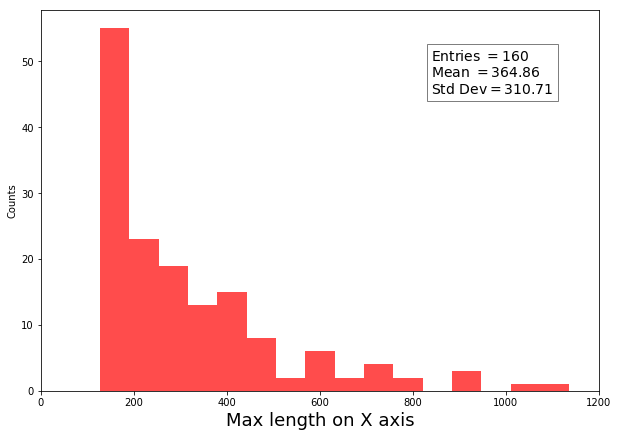

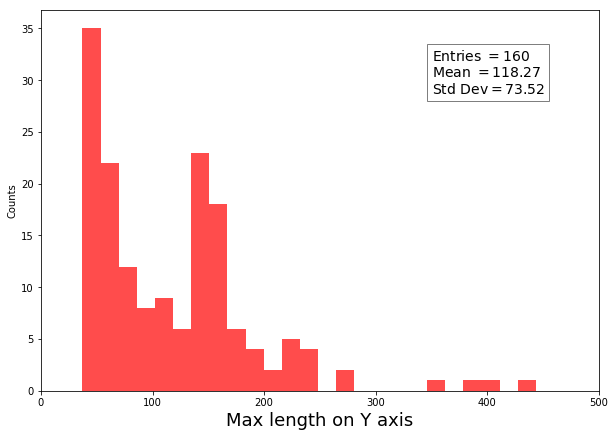

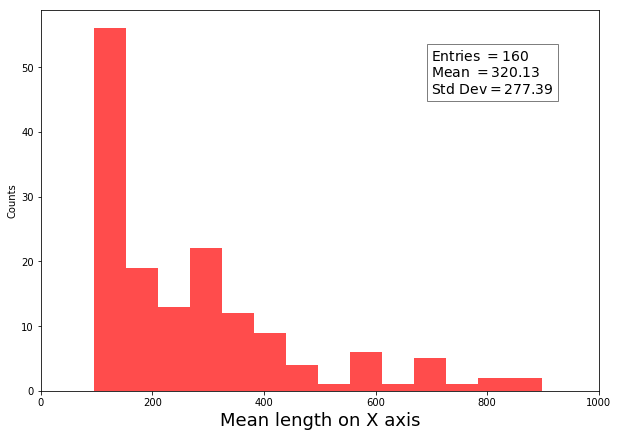

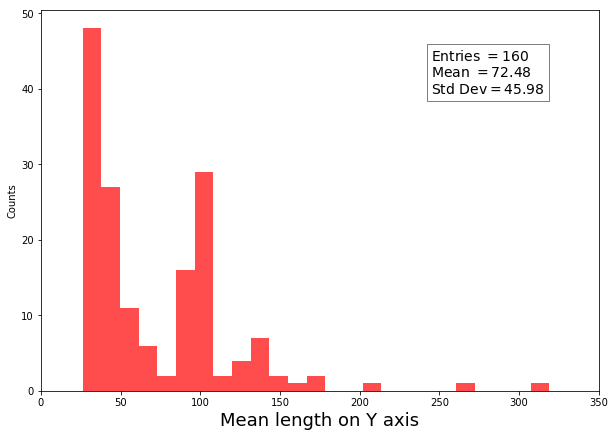

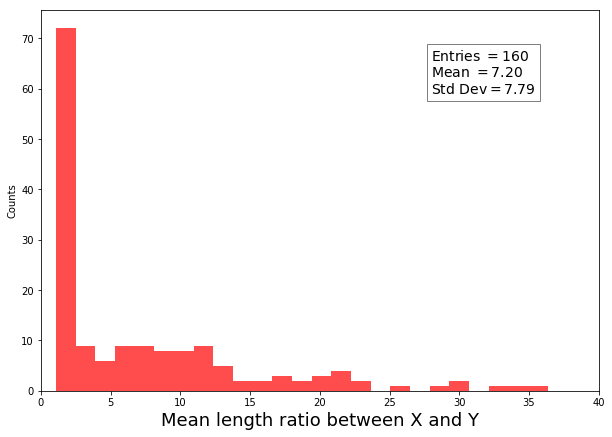

In [28]:
plot1hist(featuresL.MaxLengthX, bins = 25, liml = 0, limr = 1200, label='Max length on X axis', logx = False, logy = False, density=False)
plot1hist(featuresL.MaxLengthY, bins = 25, liml = 0, limr = 500, label='Max length on Y axis', logx = False, logy = False, density=False)
plot1hist(featuresL.MeanLengthX, bins = 25, liml = 0, limr = 1000, label='Mean length on X axis', logx = False, logy = False, density=False)
plot1hist(featuresL.MeanLengthY, bins = 25, liml = 0, limr = 350, label='Mean length on Y axis', logx = False, logy = False, density=False)
plot1hist(featuresL.MeanLengthX/featuresL.MeanLengthY, bins = 25, liml = 0, limr = 40, label='Mean length ratio between X and Y', logx = False, logy = False, density=False)

/usr/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


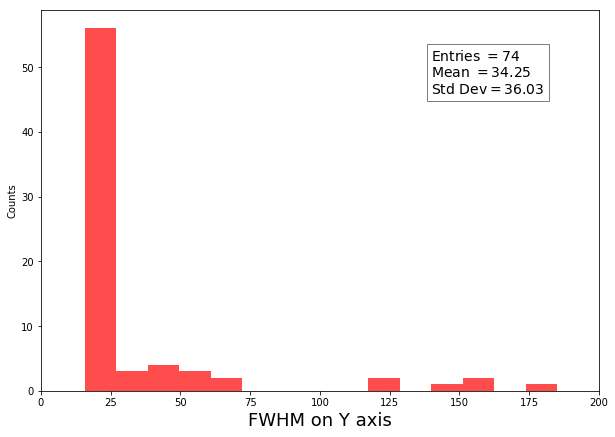

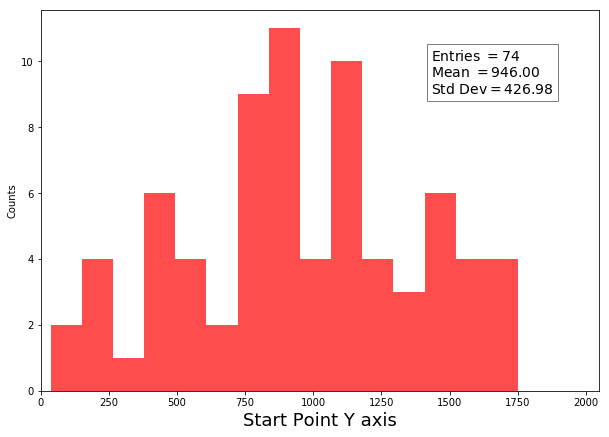

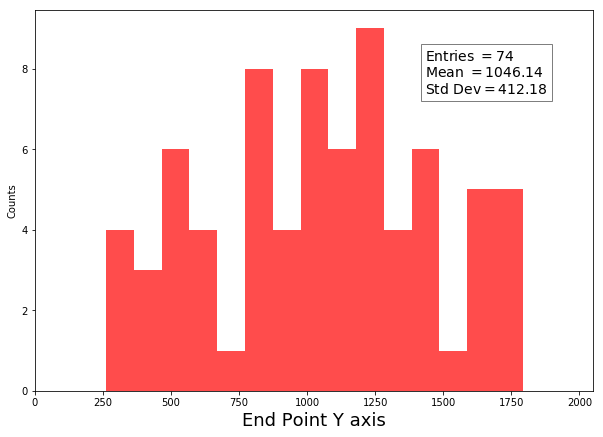

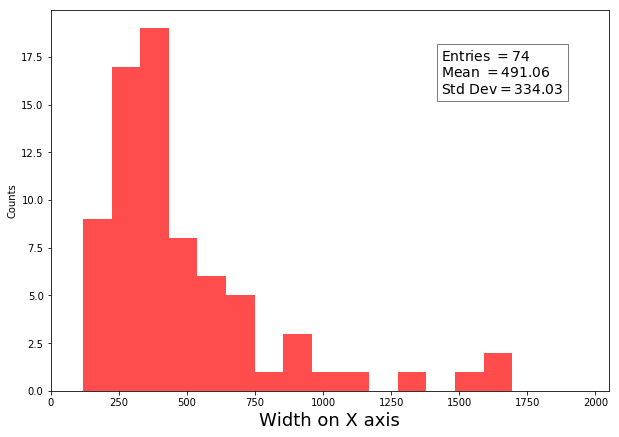

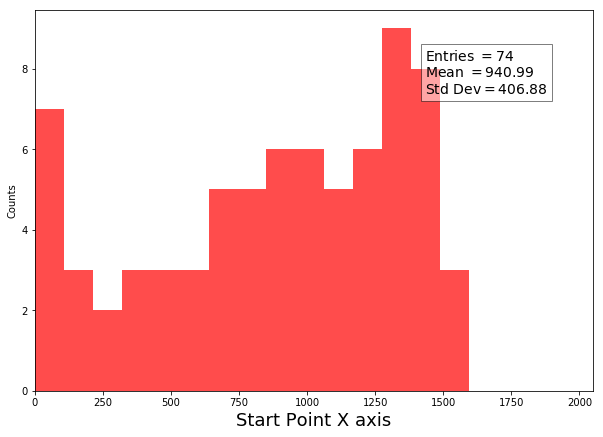

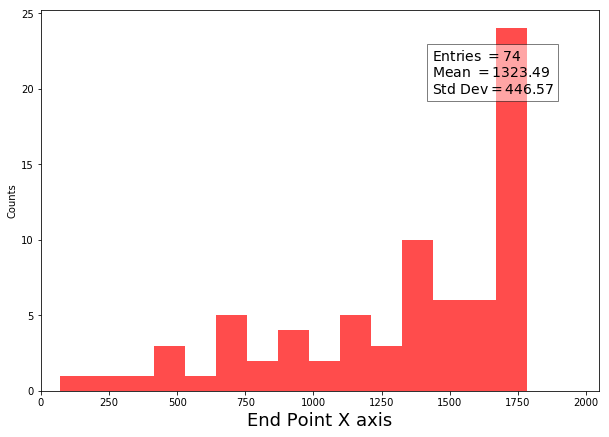

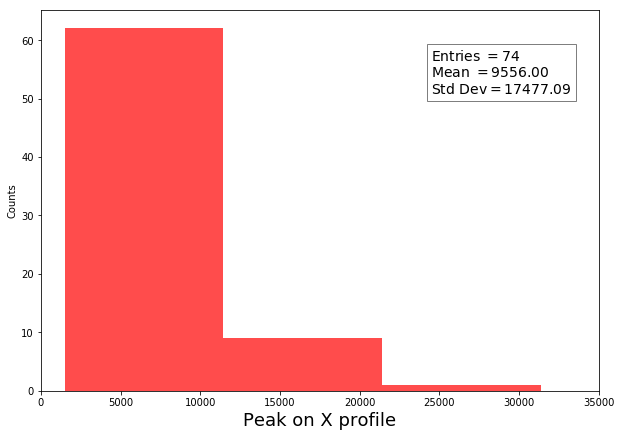

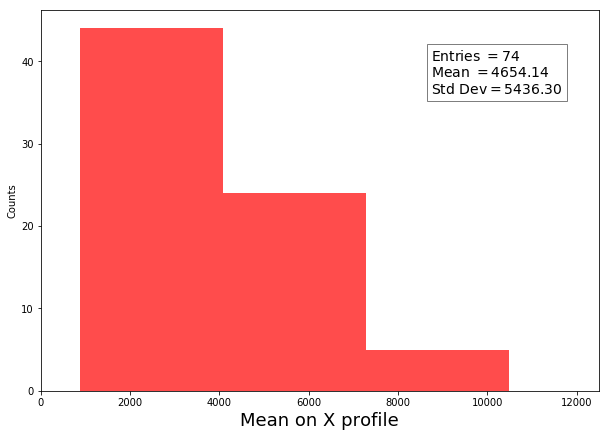

In [29]:
plot1hist(featuresL.WidthY[(featuresL.Image < 210) & (featuresL.Image < 210)], bins = 15, liml = 0, limr = 200, label='FWHM on Y axis', logx = False, logy = False, density=False)
plot1hist(featuresL.StartY[featuresL.Image < 210], bins = 15, liml = 0, limr = 2048, label='Start Point Y axis', logx = False, logy = False, density=False)
plot1hist(featuresL.EndY[featuresL.Image < 210], bins = 15, liml = 0, limr = 2048, label='End Point Y axis', logx = False, logy = False, density=False)

plot1hist(featuresL.WidthX[featuresL.Image < 210], bins = 15, liml = 0, limr = 2048, label='Width on X axis', logx = False, logy = False, density=False)
plot1hist(featuresL.StartX[featuresL.Image < 210], bins = 15, liml = 0, limr = 2048, label='Start Point X axis', logx = False, logy = False, density=False)
plot1hist(featuresL.EndX[featuresL.Image < 210], bins = 15, liml = 0, limr = 2048, label='End Point X axis', logx = False, logy = False, density=False)
plot1hist(featuresL.PeakX[featuresL.Image < 210], bins = 15, liml = 0, limr = 35000, label='Peak on X profile', logx = False, logy = False, density=False)
plot1hist(featuresL.MeanX[featuresL.Image < 210], bins = 15, liml = 0, limr = 12500, label='Mean on X profile', logx = False, logy = False, density=False)

# End and Start Points

In [30]:
sx = np.array(featuresL.StartX[featuresL.Image < 210])
ex = np.array(featuresL.EndX[featuresL.Image < 210])
sxy = np.array(featuresL.StartXy[featuresL.Image < 210])
exy = np.array(featuresL.EndXy[featuresL.Image < 210])

In [31]:
[sx[0],ex[0]]

[232.0, 1739.0]

/usr/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


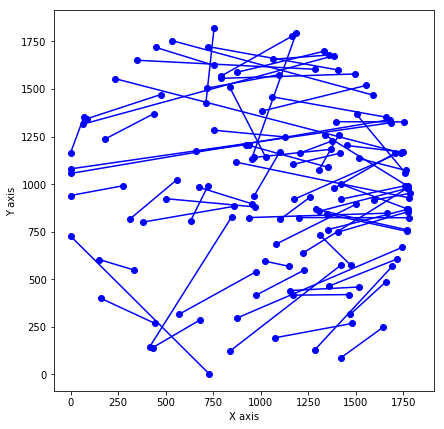

In [32]:
fig = plt.figure(figsize=(10,7))
for kk in range(0,np.size(sx)):
    plt.plot([sx[kk], ex[kk]], [sxy[kk], exy[kk]], 'b-o')
    
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.xlim([0,2048])
plt.ylim([0,2048])
plt.axis('square')
plt.show()

# Wrong Clusters

Text(0,0.5,'Max Length on X axis')

/usr/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


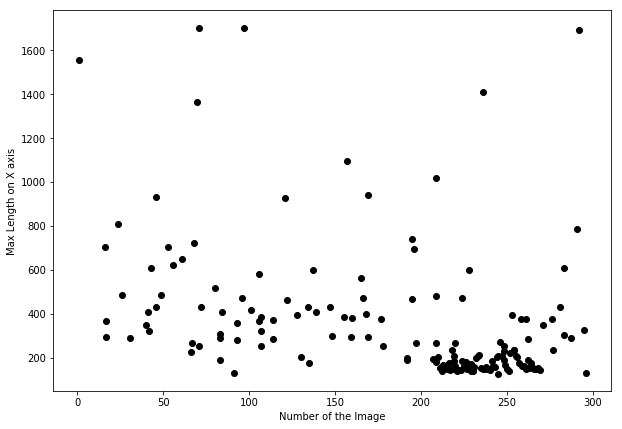

In [33]:
fig = plt.figure(figsize=(10,7))

plt.scatter(featuresL.Image,featuresL.MaxLengthX, c='k', marker='o')
plt.xlabel('Number of the Image')
plt.ylabel('Max Length on X axis')
#plt.ylim([0,200])

/home/igorabritta/cygno/toolslib.py:174: RankWarning: Polyfit may be poorly conditioned
  zo = polyfit(yo,xo, 1)
/usr/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


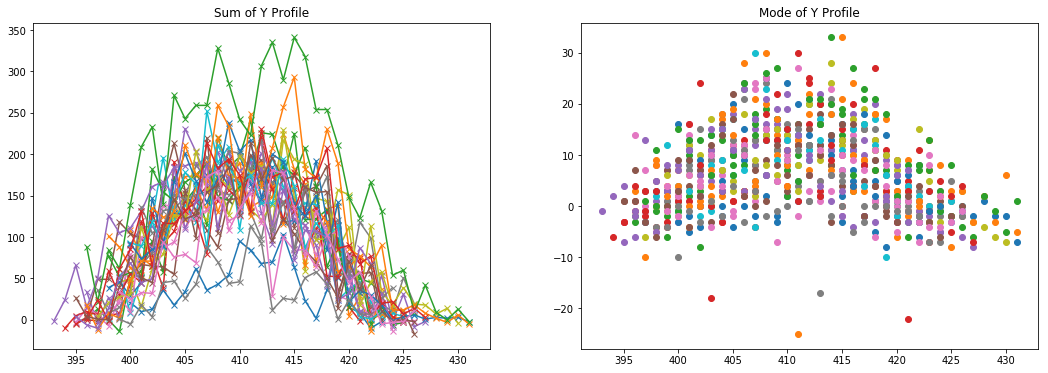

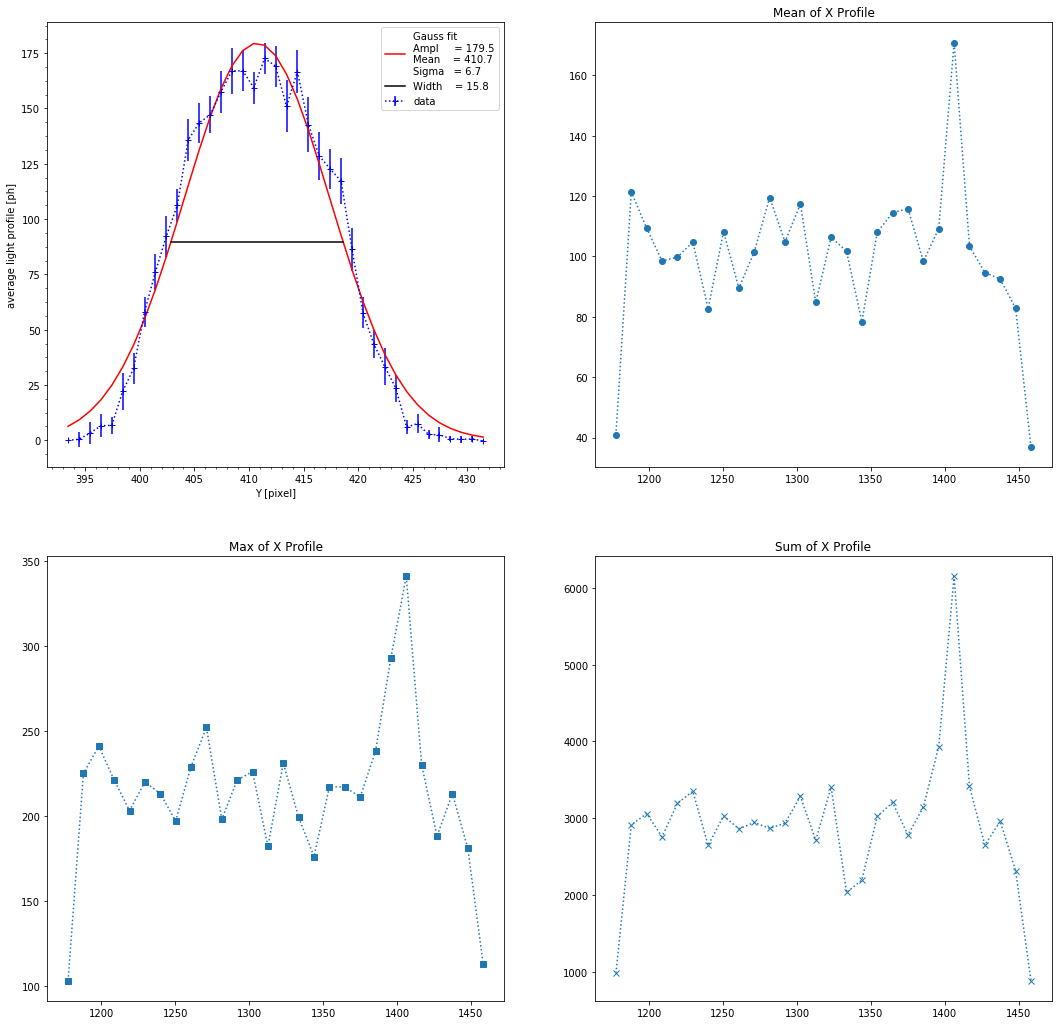

In [35]:
ind = 2564

angle = tl.getAngle(df.X[ind],df.Y[ind])
    
newX,newY = tl.rotate(df.X[ind][0],df.Y[ind][0],df.X[ind],df.Y[ind],angle)

widthY, widthX, peakX, meanX = plot_shapeprofile(X = newX,Y = newY, L = df.Light[ind], P = df.Pedestal[ind], px = 10, debug = True)
#plot_shapeprofile(X = newX,Y = newY, L = df.Light[91], P = 0, pieces = 140)

In [19]:
def plot_shapeprofile(X,Y,L,P = 0, px = 10, debug = False):
    from scipy import stats
    from scipy.optimize import curve_fit
    from astropy.modeling.models import Gaussian1D

    
    L    = np.array(L) - np.array(P)
    newX = np.array(X) # Direction of the slices
    newY = np.array(Y) # Direction of the Mean Length

    pieces = np.int(np.round((np.max(newX)-np.min(newX))/px))
    slices = np.linspace(np.min(newX),np.max(newX),pieces)
    piecesY = np.int(np.round(np.max(newY))-np.round(np.min(newY)))
    
    xm = np.zeros([pieces-1,],dtype=float)
    zm = np.zeros([pieces-1,],dtype=float)
    zs = np.zeros([pieces-1,],dtype=float)
    zM = np.zeros([pieces-1,],dtype=float)
    
    matrixY = np.zeros([pieces-1,piecesY+1],dtype=float)
    ct = np.zeros([piecesY+1],dtype=float)
    
    if debug:
        fig, ax = plt.subplots(1,2,figsize=(18, 6))
    
    for i in range(0,(pieces-1)):

        y = newY[(newX > slices[i]) & (newX < slices[i+1])]
        #x = newX[(newX > slices[i]) & (newX < slices[i+1])]
        z = L[(newX > slices[i]) & (newX < slices[i+1])]
        
        xm[i] = (slices[i] + slices[i+1])/2
        
        if debug:
            iy, uy = get_shapeprofile(axi = y,light = z,fig = fig, ax = ax, debug = debug)
        else:
            iy, uy = get_shapeprofile(axi = y,light = z,fig = None, ax = None, debug = debug)
        
        ii = uy-np.round(np.min(newY))
        
        matrixY[i,ii.astype(int)] = iy
        
        zm[i] = np.mean(iy)
        zs[i] = np.sum(iy)
        zM[i] = np.max(iy)
        
    if debug:
        fig1, ax1 = plt.subplots(2,2,figsize = (18, 18))
        ax1[1,1].plot(xm,zs,'x:')
        ax1[1,1].set_title("Sum of X Profile")
        ax1[0,1].plot(xm,zm,'o:')
        ax1[0,1].set_title("Mean of X Profile")
        ax1[1,0].plot(xm,zM,'s:')
        ax1[1,0].set_title("Max of X Profile")
    
    
    for jj in range(0,piecesY+1):
        aux = matrixY[:,jj]
        ct[jj] = np.size(aux[aux != 0])
    
    # - - - - - - - - - - - - - - - - - - - - -
    Yproj = np.mean(matrixY,axis = 0)
    errY = np.std(matrixY,axis = 0)/np.sqrt(ct)
    xy    = np.arange(0,piecesY+1)+np.min(newY)

    # weighted arithmetic mean (corrected - check the section below)
    sg = 4
    mean = sum(xy * Yproj) / sum(Yproj)
    sigma = np.sqrt(sum(Yproj * (xy - mean)**2) / sum(Yproj))
    
    
    def Gauss(x, a, x0, sigma):
        return a * np.exp(-(x - x0)**2 / (2 * sigma**2))
    
    if debug:
        ax1[0,0].errorbar(xy, Yproj, yerr = errY, fmt = 'b+:', label='data')
    try:
        popt,pcov = curve_fit(Gauss, xy, Yproj, p0=[max(Yproj), mean, sigma])
        if debug:
            ax1[0,0].plot(xy, Gauss(xy, *popt), 'r-',
               label='Gauss fit   \nAmpl     = %.1f\nMean    = %.1f\nSigma   = %.1f' %
               (popt[0], popt[1], popt[2]))
        g1     = Gaussian1D(np.max(Gauss(xy, *popt)), mean = popt[1], stddev= popt[2])
        #width  = popt[2]*sg
        widthY = g1.fwhm 
    except:
        print ("fit error")
    if debug:
        ax1[0,0].plot(np.linspace(popt[1]-(widthY/2),popt[1]+(widthY/2),10),
                      np.ones(10,dtype='float')*(g1.amplitude/2),
                      '-k',label = 'Width    = %.1f' % (widthY))
        ax1[0,0].set_xlabel('Y [pixel]')
        ax1[0,0].set_ylabel('average light profile [ph]')
        ax1[0,0].minorticks_on()
        ax1[0,0].legend()
        plt.show()
        fig1.hold
    
        
    ###### X information ############
    widthX = np.max(xm)-np.min(xm)
    peakX  = np.max(zs)
    meanX  = np.mean(zs)
    
    return widthY, widthX, peakX, meanX

In [20]:
def get_shapeprofile(axi, light, fig, ax, debug = False):
    from scipy import stats
    
    uy = np.unique(np.round(axi))
    iy = np.zeros([np.size(uy),], dtype = float)
    my = np.zeros([np.size(uy),], dtype = float)

    for jj in range(0,np.size(uy)):
        ind = np.where(np.round(axi) == uy[jj])
        iy[jj]  = np.sum(light[ind])
        my[jj]  = stats.mode(light[ind])[0]

    if debug:
        #fig, ax = plt.subplots(1,2,figsize=(18, 6))
        ax[0].plot(uy,iy,'-x')
        ax[0].set_title("Sum of Y Profile")
        ax[1].plot(uy,my,'o')
        ax[1].set_title("Mode of Y Profile")
        fig.hold
    return iy,uy.astype(int)

In [21]:
def pl3d(X,Y,Z,azim=0, bottom = 80):

    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt



    fig = plt.figure(figsize = (10,7))
    ax  = fig.add_subplot(111, projection='3d')

    ax.scatter(X, Y, Z, c = 'r', marker = 'o')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_zlim(bottom = bottom)
    ax.view_init(elev = 0., azim = azim)

    plt.show()

In [22]:
def get_sliceleng(X,Y,pieces):
    # Function to get the mean length of the cluster
    # in X or Y direction.
    pieces = pieces
    
    newX = np.array(X) # Direction of the slices
    newY = np.array(Y) # Direction of the Mean Length
    
    slices = np.linspace(np.min(newX),np.max(newX),pieces)
    meanLY = np.zeros([(pieces-1),],dtype=float)

    for i in range(0,(pieces-1)):
    
        y = newY[(newX > slices[i]) & (newX < slices[i+1])]
        meanLY[i] = np.max(y) - np.min(y)
    return meanLY

In [23]:
def plot1hist(variable, bins, liml = 0, limr = 50, label = '', density = True, logx = False, logy = False):
    ## Function to show one variable on a histogram
    
    # variable = is a 1xN List with the variable information                       - List
    # nins     = is the number of bins to construct the histogram                  - int
    # nsd      = is the multiplication factor of the sigma to define the Xlim min  - float
    # nse      = is the multiplication factor of the sigma to define the Xlim max  - float
    # label    = is the Xlabel to show in the plot                                 - string
    # density  = is the flag to set the histogram to show the density or not       - Boolean
    # logx     = is the flag to set the X axis to log on the histogram or not      - Boolean
    # logy     = is the flag to set the Y axis to log on the histogram or not      - Boolean
    
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(10,7))
    ax  = fig.add_subplot(111)
    
    v2  = variable
    e   = np.size(v2)
    m   = np.mean(v2[(v2 != 0) & (np.isnan(v2) == False)])
    s   = np.std(v2[(v2 != 0) & (np.isnan(v2) == False)])
    
    plt.hist(variable, bins=bins, fc='r', alpha = 0.7, density=density)
    plt.xlim([liml, limr])
    
    if logx:
        plt.xscale("log")
    if logy:
        plt.yscale("log")
    if density:
        plt.ylabel('Probability')
    else:
        plt.ylabel('Counts')
    plt.xlabel(label,fontsize=18)
    #plt.legend(['Recoils', 'Soft Electrons', 'MeV Electrons'],prop={'size': 18})

    textstr = '\n'.join((
        r'Entries $=%d$' % (e, ),
        r'Mean $=%.2f$' % (m, ),
        r'Std Dev$ =%.2f$' % (s, )))

    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='square', facecolor='white', alpha=0.5)

    # place a text box in upper left in axes coords
    plt.text(0.7, 0.9, textstr, fontsize=14,
            verticalalignment='top',transform=ax.transAxes, bbox=props)
    
    plt.show()